In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re

In [2]:
df1 = pd.read_csv('data/cleaned_data/cleaned_data1.csv')
df2 = pd.read_csv('data/cleaned_data/cleaned_data2.csv')

In [3]:
df1.head()

,title,text,Label
0,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [4]:
df2.head()

,title,text,Label
0,UNIV Of WI Chancellor Contacts Police After No...,Is anyone else concerned that the Left was abl...,0
1,"While We Were Sleeping, Trump Declared Civil War",I woke up this morning completely unfazed over...,0
2,"BREAKING: GA, KY, WV Confirm They Suspect Obam...",Georgia s secretary of state has claimed the D...,0
3,U.S. Air Force Advertises Martin Luther King ...,Put this one under Shit You Just Can t Make U...,0
4,The Walls Close In On Trump As His Disgraced ...,"Donald Trump s scandal-ridden, chaotic White H...",0


In [5]:
# concatinating
df3 = pd.concat([df1,df2]).reset_index(drop = True)

In [6]:
#shuffling
df3 = df3.sample(frac=1).reset_index(drop=True)
df3

,title,text,Label
0,"U.S. vice president to visit South Korea, Japa...",U.S. Vice President Mike Pence will travel to...,1
1,U.S. warns of sanctions on any country trading...,U.S. Treasury Secretary Steve Mnuchin said on...,1
2,BREAKING: TRUMP CANCELS Order For New Air Forc...,"The entire cost of the program, including deve...",0
3,"Among White House hopefuls, Trump least likely...",The millions of Twitter users following Donal...,1
4,Paris exhibition charts Picasso's 'year of won...,PARIS (Reuters) - Some of Pablo Picasso’s grea...,1
...,...,...,...
48877,"Oh, rats! Big tree-dwelling rodent found in So...","An illustration of a new species, Uromys vika ...",1
48878,10/7 Post-Season: Bad Day at the Shop...0-for-...,A Potato Battery Can Light up a Room for Over ...,0
48879,HANNITY AND TUCKER CARLSON: THE 5 MAJOR FORCES...,Sean Hannity and Tucker Carlson went after the...,0
48880,WHOA! FLASHBACK VIDEO Of ANDREW BREITBART: “Wh...,**Language warning***Many people don t know th...,0


In [7]:
#cleaning
def clean_text(sample):
    sample = sample.lower()
    sample = re.sub(r'[^\w\s]','',sample) # removes all the signs
    sample = re.sub(r'\n','',sample) # removes newline characters
    sample = re.sub(r'\d','',sample) # removes digits
    return sample

In [8]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48882 entries, 0 to 48881
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   48882 non-null  object
 1   text    48882 non-null  object
 2   Label   48882 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [9]:
df3['title'] = df3['title'].apply(clean_text)
df3['text'] = df3['text'].apply(clean_text)

In [10]:
df3.head()

,title,text,Label
0,us vice president to visit south korea japan i...,us vice president mike pence will travel to s...,1
1,us warns of sanctions on any country trading w...,us treasury secretary steve mnuchin said on w...,1
2,breaking trump cancels order for new air force...,the entire cost of the program including devel...,0
3,among white house hopefuls trump least likely ...,the millions of twitter users following donal...,1
4,paris exhibition charts picassos year of wonders,paris reuters some of pablo picassos greatest...,1


In [11]:
df3[df3['title']==''],df3[df3['title']=='']

(Empty DataFrame
 Columns: [title, text, Label]
 Index: [],
 Empty DataFrame
 Columns: [title, text, Label]
 Index: [])

In [12]:
df3.iloc[289,1]

'the corrupt covering for the corrupt chicago politics at its best hillary clinton could be prosecuted in federal court for failing to tell president barack obama about her private email server at the time she was running it according to a veteran fbi agent obama said flatly during a   minutes  interview on sunday that  no  he did not know clinton sidestepped security protocols with her a homebrew email setup while she was his secretary of statethe fbi agent who spoke with dailymailcom has had a year career in federal law enforcement and serves in a supervisory capacity in a domestic fbi field officehe said on friday that failing to put obama in the loop could be enough to send her to prison for ten years viadaily mailever since he opined that the police had  acted stupidly  prior to the infamous and embarrassing  beer summit  obama has shown himself eager to interfere with ongoing investigations for political reasons when thuglet trayvon martin provided an good example of why jumping 

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [14]:
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')
stop_words.extend(['the',"u",'us',"vp",'st'])
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
def clean_text(sample):
    filter_sentance = ''
    # Tokenization
    words = nltk.word_tokenize(sample)
    
    if len(words)>20:
        # Stopwords removal
        words = [w for w in words if not w in stop_words]

        # Lemmatization/stemming
        for words in words:
            filter_sentance = filter_sentance  + ' ' +str(lemmatizer.lemmatize(words)).lower()

        return filter_sentance 
    else:
        return np.NaN

In [16]:
def clean_title(sample):
    filter_sentance = ''
    # Tokenization
    words = nltk.word_tokenize(sample)
    
    if len(words)>4 and len(words)<27:
        # Stopwords removal
        words = [w for w in words if not w in stop_words]

        # Lemmatization/stemming
        for words in words:
            filter_sentance = filter_sentance  + ' ' +str(lemmatizer.lemmatize(words)).lower()

        return filter_sentance 
    else:
        return np.NaN

In [17]:
df3['title'] = df3['title'].apply(clean_title)
df3['text'] = df3['text'].apply(clean_text)

In [18]:
df3

,title,text,Label
0,vice president visit south korea japan indone...,vice president mike penny travel south korea ...,1
1,warns sanction country trading north korea,treasury secretary steve mnuchin said wednesd...,1
2,breaking trump cancel order new air force one...,entire cost program including development cos...,0
3,among white house hopeful trump least likely ...,NaN,1
4,paris exhibition chart picasso year wonder,paris reuters pablo picasso greatest work go ...,1
...,...,...,...
48877,oh rat big treedwelling rodent found solomon ...,illustration new specie uromys vika shown ill...,1
48878,postseason bad day shopfor w playoff,potato battery light room month diy system us...,0
48879,hannity tucker carlson major force aligned ta...,sean hannity tucker carlson went deep state c...,0
48880,whoa flashback video andrew breitbart whats c...,language warningmany people know andrew breit...,0


In [19]:
df3.drop(index = df3[df3['title'].isnull()].index,axis=0,inplace=True)

In [20]:
df3.drop(index = df3[df3['text'].isnull()].index,axis=0,inplace=True)

In [21]:
df3

,title,text,Label
0,vice president visit south korea japan indone...,vice president mike penny travel south korea ...,1
1,warns sanction country trading north korea,treasury secretary steve mnuchin said wednesd...,1
2,breaking trump cancel order new air force one...,entire cost program including development cos...,0
4,paris exhibition chart picasso year wonder,paris reuters pablo picasso greatest work go ...,1
5,construction executive detained peru graft probe,four former current executive peruvian constr...,1
...,...,...,...
48877,oh rat big treedwelling rodent found solomon ...,illustration new specie uromys vika shown ill...,1
48878,postseason bad day shopfor w playoff,potato battery light room month diy system us...,0
48879,hannity tucker carlson major force aligned ta...,sean hannity tucker carlson went deep state c...,0
48880,whoa flashback video andrew breitbart whats c...,language warningmany people know andrew breit...,0


In [22]:
df3[df3['title']==''],df3[df3['text']=='']

(Empty DataFrame
 Columns: [title, text, Label]
 Index: [],
 Empty DataFrame
 Columns: [title, text, Label]
 Index: [])

<AxesSubplot:xlabel='Label', ylabel='count'>

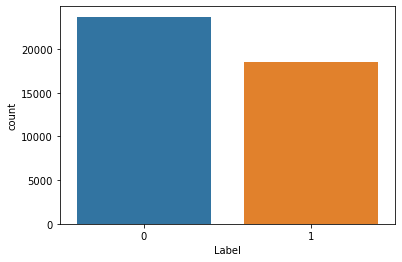

In [23]:
#slightly imbalanced
sns.countplot(x= df3['Label'])

# balancing data

In [24]:
df3[df3['Label']==1].shape,df3[df3['Label']==0].shape

((18555, 3), (23699, 3))

In [25]:
df3.drop(index = df3[df3['Label']==0][0:3000].index,inplace=True)

In [26]:
df3[df3['Label']==1].shape,df3[df3['Label']==0].shape

((18555, 3), (20699, 3))

<AxesSubplot:xlabel='Label', ylabel='count'>

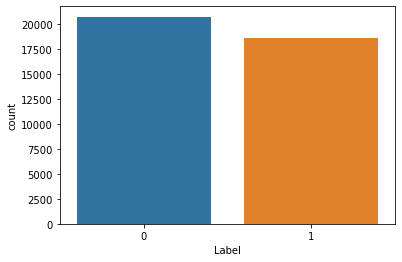

In [27]:
sns.countplot(x= df3['Label'])

In [28]:
# df3 = df3.sample(frac=0.3).reset_index(drop= True)

<AxesSubplot:xlabel='Label', ylabel='count'>

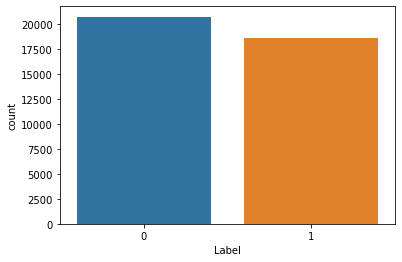

In [29]:
sns.countplot(x= df3['Label'])

In [30]:
df3.to_csv('data/cleaned_data/final_data.csv',index = False)